# **Perceptron with 2 hidden layer on Iris dataset** 

Name: 
### **2**

PRN: 
### **240340128007**

### **Implement Perceptron with Sigmoid activation Function**

In [44]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

## Import Statements

In [45]:
###-----------------
### Import Libraries
###-----------------

import os
import sys
sys.path.insert(0, r'G:\My Drive\DNN')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
 
# from utils.helper import fn_plot_decision_boundary # this function is from helper.py

In [46]:
# print (fn_plot_decision_boundary.__doc__)

## Setup Global Parameters

In [47]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 500  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 50
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. 
</div>

In [48]:
# df = datasets.load_iris()
X, y = datasets.load_iris(return_X_y=True)
X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [49]:


# X, y = data_df.data, data_df.target

In [50]:
# X, y = datasets.make_moons(n_samples=N_SAMPLES, 
#                            shuffle=True, 
#                            noise=NOISE, 
#                            random_state=RANDOM_STATE)
# X[:5], y[:5]

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [51]:
# data_df = pd.DataFrame(X, columns = ['A', 'B'])

# data_df['target'] = y

# data_df.head()

In [52]:
data_df = datasets.load_iris(as_frame=True).data

data_df['target'] = y

data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
# X, y = data_df.data, data_df.target

In [54]:
data_df.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [55]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [56]:
data_df.describe() # Generate descriptive statistic

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [57]:
# what labels are present?
data_df.target.unique()

array([0, 1, 2])

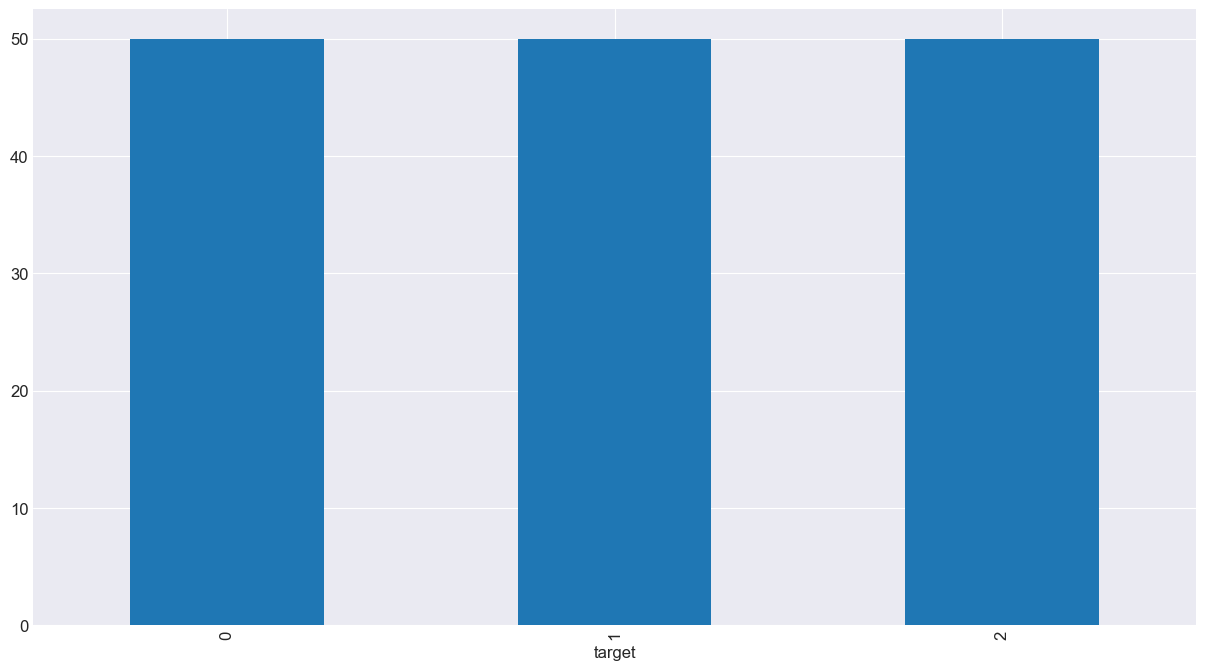

In [58]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

In [59]:
# data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [60]:
# data_train.shape, data_test.shape

In [61]:
# rng.random(data_train.shape[1])

Stochastic Gradient Descent

In [62]:
# def fn_sigmoid(z):
#     return 1 / (1 + (np.exp(-z)))

In [63]:
# softmax function 
def fn_softmax(z):
    exp_z = np.exp(z)
    
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [64]:
sm = fn_softmax(np.asarray([[8,5,0], [-10,0,10]]))
sm.sum(axis=1, keepdims = True).shape
# sm.sum(axis=1).shape

(2, 1)

In [65]:
# t = fn_sigmoid(np.asarray([[-1, 0, 1], [-np.inf, 0, np.inf]]))
# t

In [66]:
def fn_activ(x):

    return np.tanh(x)

def fn_activ_prime(x):

    return 1.0 - np.tanh(x)**2

In [67]:
def predict(model, X_p):

    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    ### Forward Propagation

    # Layer 1
    z1 = X_p.dot(W1) + b1 # Aggregation
    a1 = fn_activ(z1) # Activation

    # Layer 2
    z2 = a1.dot(W2) + b2 # Aggregation
    a2 = fn_softmax(z2) # Activation
    
    return np.argmax(a2, axis=1) # pick index of class with highest probability

In [68]:
def calculate_loss(model, X_l, y_l):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    m = X_l.shape[0]

    # Layer 1
    z1 = X_l.dot(W1) + b1 # Aggregation z = X.W + b
    a1 = fn_activ(z1) # Activation a = g(z)

    # Layer 2 marked 1
    z2 = a1.dot(W2) + b2 # Aggregation z = X.W + b
    a2 = fn_softmax(z2) # Activation a = g(z)
    
    data_loss = -(y_l*np.log(a2) + (1 - y_l) * np.log(1 - a2)).sum() # Binary 

    return data_loss/m 

In [69]:
loss_hist = {}

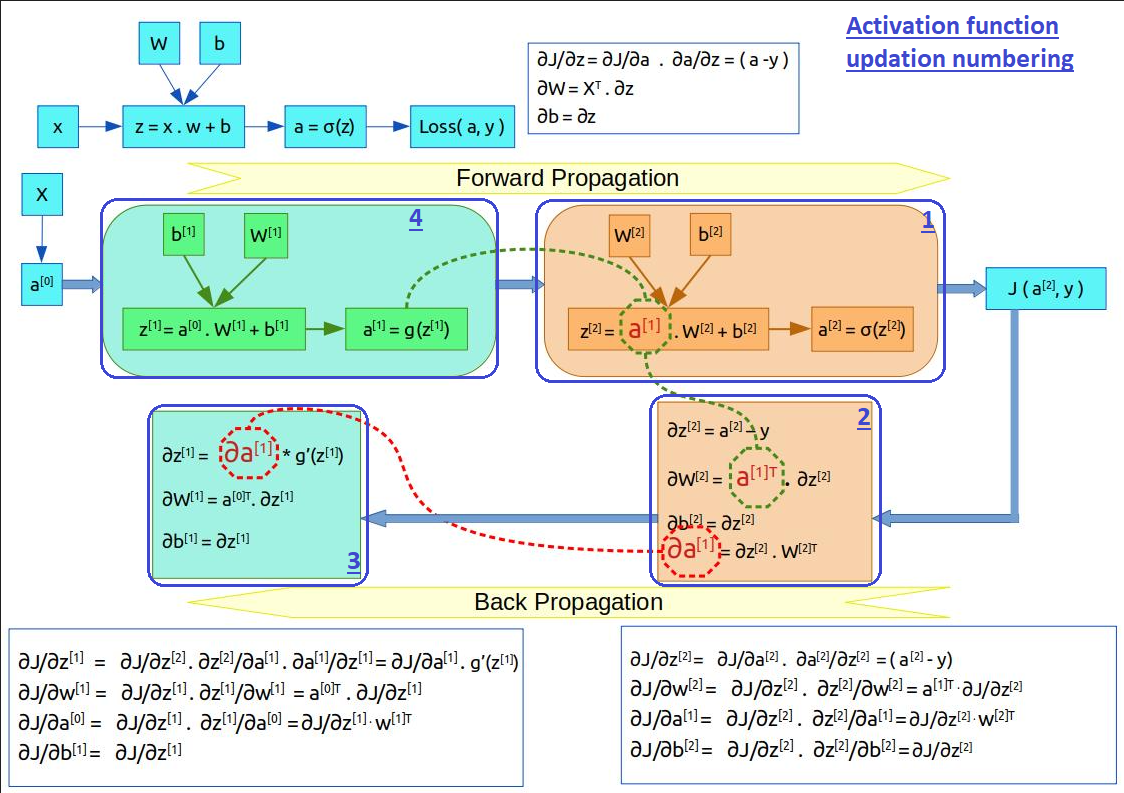

In [70]:
def build_model(X_tr, y_tr, nn_hdim, nn_out, alpha=ALPHA ,epochs = EPOCHS):
    '''
    Args:
        X_tr : Training features
        y_tr : Training labels
        nn_hdim : Number of nodes in the hidden layer
        nn_out : Size of output
    '''
    m, nn_input_dim = X_tr.shape
    nn_output_dim = nn_out
    
    # W1 = rng.random.rand((nn_input_dim, nn_hdim), 
    #          dtype = np.float32) / np.sqrt(nn_input_dim)

    # W2 = rng.random.rand((nn_hdim, nn_output_dim), 
    #         dtype = np.float32) / np.sqrt(nn_hdim)

    # size = 2,4
    W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    # size = 4,2
    W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    # size = 4
    b1 = np.zeros((1, nn_hdim), dtype= np.float32)
    # size = 2
    b2 = np.zeros((1, nn_output_dim), dtype= np.float32)

    curr_loss = 0
    loss, epoch = [], []

    for i in range(0, epochs):
        ### Forward Propagation

        # Layer 1 *marked 3*
        z1 = X_tr.dot(W1) + b1 # Aggregation z = X.W + b
        a1 = fn_activ(z1) # Activation a = g(z)

        # Layer 2 *marked 1*
        z2 = a1.dot(W2) + b2 # Aggregation z = X.W + b
        a2 = fn_softmax(z2) # Activation a = g(z)
    
        # Back Propagation 
        # layer 2 *marked 2* (orange color)
        assert (a2.shape == y_tr.shape), f'check y {a2.shape}/{y_tr.shape}'
        dz2 = a2 - y_tr ## REMEMBER dim of a2 and y to be same

        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2, axis= 0 , keepdims = True)
        assert(b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'

        # Layer1 *marked 4*
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check z1 {z1.shape}/{dz1.shape}'
    
        dW1 = (X_tr.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check W1 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1, axis= 0 , keepdims = True) # db = 
        assert(b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'


        # Gradient Update
        W1 += -alpha * dW1/m
        b1 += -alpha * db1/m
        W2 += -alpha * dW2/m
        b2 += -alpha * db2/m

        model = {'W1': W1, 'b1' : b1,
                 'W2': W2, 'b2' : b2
                 }
    
        curr_loss = calculate_loss(model, X_tr, y_tr)
        loss.append(curr_loss)
        epoch.append(i)
        
        if i%100 == 0:
            print(f'After epoch: {i:3d}; loss: {curr_loss: .5f}')

    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss

    return model

In [71]:
loss_hist= {}

In [72]:
y = pd.get_dummies(y).to_numpy()
y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=TEST_SIZE,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE)

In [74]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=TEST_SIZE,
#                                                     random_state=RANDOM_STATE, 
#                                                     shuffle=False) # We can either use stratify or shuffle=False. Not both together.

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [76]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)


In [78]:
print(y_train.shape)
# y_train = y_train.reshape(-1, 1)
# y_train.shape
y_train

(120, 3)


array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0,

In [79]:
print(y_test.shape)

(30, 3)


In [80]:
nn_out_dim = 3

model = build_model(X_train, y_train, 4, nn_out_dim)

After epoch:   0; loss:  1.95962
After epoch: 100; loss:  0.73974
After epoch: 200; loss:  0.44057
After epoch: 300; loss:  0.28315
After epoch: 400; loss:  0.21113


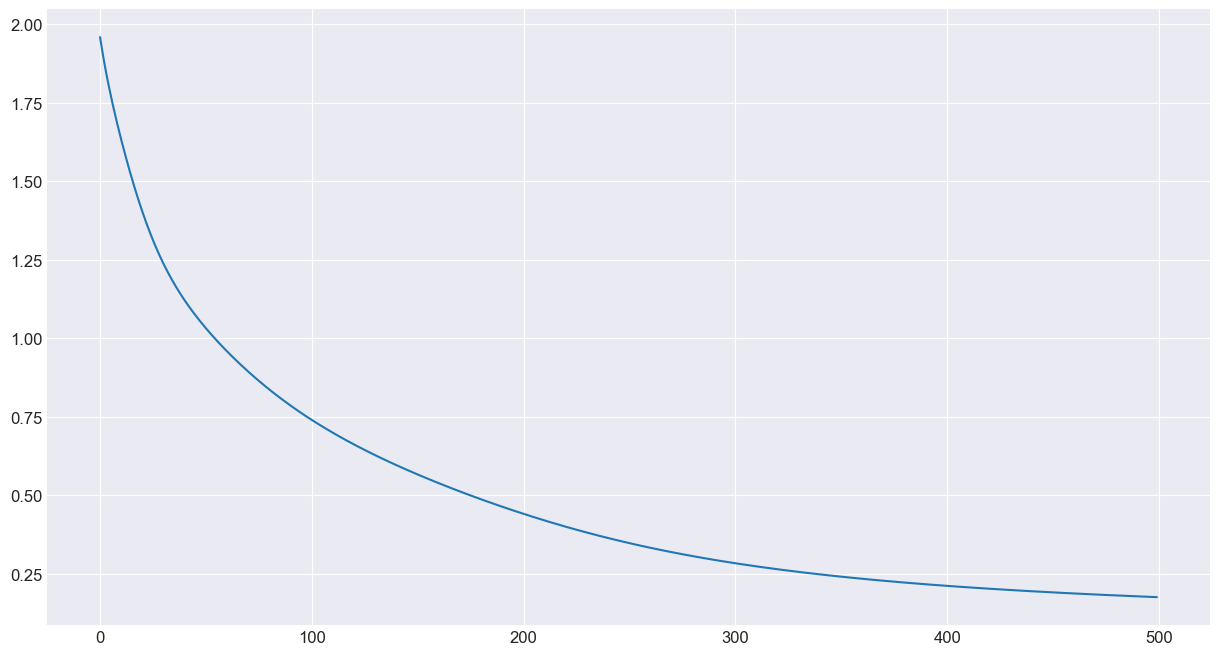

In [81]:
plt.plot(loss_hist['epoch'], loss_hist['loss'])

In [82]:
model

{'W1': array([[ 0.36170186,  0.03421667, -0.02062021,  0.2244987 ],
        [-0.67995298, -0.10809781, -0.19361548, -0.60078239],
        [ 0.48883189,  0.47989801,  0.8675475 ,  0.72369491],
        [ 0.79072655,  0.90122034,  1.441845  ,  0.6268551 ]]),
 'b1': array([[ 0.37416506, -0.5367958 , -1.3959916 ,  0.45202383]],
       dtype=float32),
 'W2': array([[-1.40259321,  1.02342634,  1.26721464],
        [-0.73488173,  0.05279635,  1.70320525],
        [-0.49965307, -0.96663018,  2.60720135],
        [-1.04310575,  1.19219984,  1.09001516]]),
 'b2': array([[-0.17429818,  0.5650842 , -0.39078674]], dtype=float32)}

In [83]:
y_pred = predict(model, X_train)

print(accuracy_score(np.argmax(y_train, axis=1), y_pred))



0.975


In [84]:
y_pred = predict(model, X_test)

print(accuracy_score(np.argmax(y_test, axis=1), y_pred))

0.9666666666666667


In [85]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

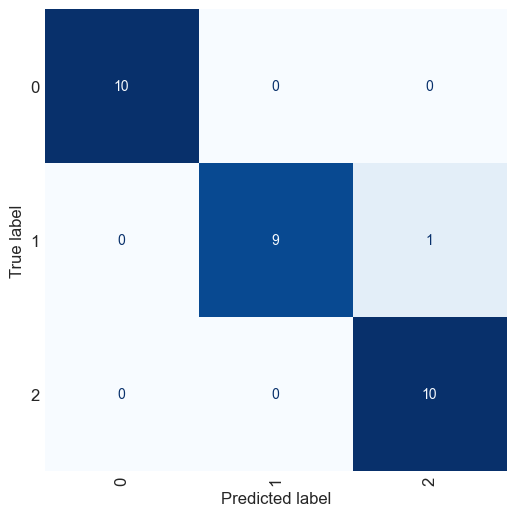

In [86]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
fig, ax = plt.subplots(figsize = (6,6))

disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
# Disable the grid
ax.grid(False)

plt.show();